In [337]:
import numpy as np
import scipy as scp
from scipy.interpolate import interp1d
from scipy.stats import binned_statistic
from scipy.fftpack import fft
from scipy.fftpack import ifft
from scipy.fftpack import rfft
from scipy.fftpack import irfft
from scipy.fftpack import fftshift
import matplotlib.pyplot as plt

In [376]:
# Calculate once
N = 4096 * 4
bins = np.linspace(5, 15, N + 1)
d_bins = bins[2] - bins[1]
bin_means = np.array([(bins[i] + bins[i - 1]) / 2 for i in range(1, len(bins))])
freq = (1 / (d_bins * N) * bin_means * N)
freq -= np.mean(freq)
h = 0.1
norm_ft = scp.stats.norm.pdf(freq * h, loc = 0, scale = 1)

#x_discrete = bins[np.digitize(x, bins, right = False)]

In [377]:
x = np.random.normal(size = 100000, loc = 10, scale = 0.5)

In [378]:
#%%timeit -r 5
# N = len(x_counts)
# Get samples (we can assume samples having come binned)
x_counts, _ = np.histogram(x, bins = bins)

# Compute fft
x_ft = fftshift(fft(x_counts / len(x))) 
kde = ifft(norm_ft * x_ft * np.sqrt(2 * np.pi))

# # Compute interpolation function
f = interp1d(bin_means, np.abs(np.real(kde)), copy = False, assume_sorted = True)
f(x_interpolate)
#L = np.arange(int(np.floor(N / 2)))

array([0.00000000e+00, 3.38813179e-21, 1.10114283e-20, ...,
       9.72820056e-17, 1.33238329e-18, 6.10936775e-20])

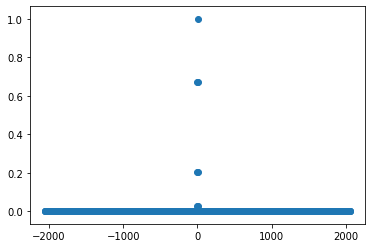

In [302]:
psd = x_ft * x_ft.conjugate() 
plt.scatter(freq, np.real(psd))

In [332]:
x_counts, _ = np.histogram(x, bins = bins)

In [333]:
# Perform inverse fourier transform
x_counts.shape

(16384,)

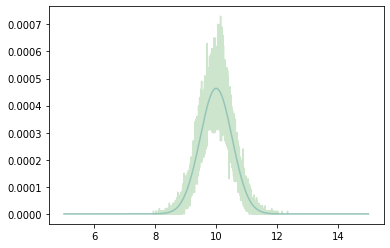

In [379]:
plt.plot(bin_means, np.real(abs(kde)), alpha = 0.3)
plt.plot(bin_means, x_counts / len(x), alpha = 0.2, color = 'green')

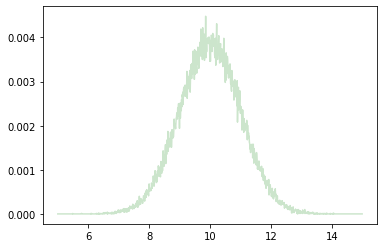

In [225]:
plt.plot(bin_means, x_counts / len(x), alpha = 0.2, color = 'green')

In [15]:
np.histogram(x, bins = bins)

(array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   0,   0,   2,   1,   1,   1,   1,   4,   1,   2,   6,   6,
          8,  12,   6,  15,  13,  18,  24,  28,  25,  35,  47,  44,  59,
         51,  62,  76,  91,  98, 126, 132, 143, 139, 170, 174, 192, 192,
        226, 241, 253, 270, 309, 316, 295, 284, 307, 304, 303, 285, 344,
        322, 302, 274, 307, 261, 259, 257, 222, 231, 199, 196, 171, 163,
        142, 133, 122,  89,  89,  74,  72,  62,  49,  42,  44,  30,  25,
         28,  22,  15,   7,  13,   7,   9,   1,   4,   5,   1,   4,   0,
          1,   1,   0,   0,   0,   0,   0,   0,   0

In [232]:
N = len(x_counts)
x_ft = rfft(x_counts / len(x))
psd = x_ft * x_ft.conjugate() 
freq = (1 / (d_bins * N) * bin_means * N)
#freq -= np.mean(freq) 
#L = np.arange(int(np.floor(N / 2)))

In [251]:
x_ft[40]

-0.0006382633442377949

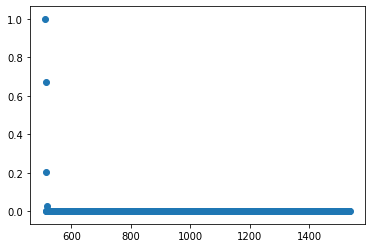

In [233]:
plt.scatter(freq, np.real(psd))

In [234]:
h = 0.1
norm_ft = scp.stats.norm.pdf(freq * h, loc = 0, scale = 1)

In [237]:
kde = irfft(norm_ft * x_ft)

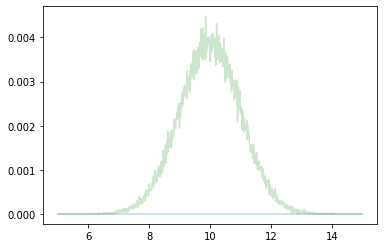

In [238]:
plt.plot(bin_means, kde * np.sqrt(2 * np.pi), alpha = 0.3)
plt.plot(bin_means, x_counts / len(x), alpha = 0.2, color = 'green')
#plt.hist(x, bins = bins, alpha = 0.2, density = True)

In [306]:
_

array([ 5.        ,  5.00244141,  5.00488281, ..., 14.99511719,
       14.99755859, 15.        ])

In [309]:
N

4096

In [356]:
x_interpolate = np.sort(np.random.normal(size = 10000, loc = 10))


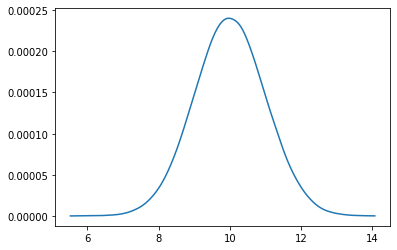

In [352]:
plt.plot(x_interpolate, f(x_interpolate),)

In [360]:
%%timeit -r 5


312 µs ± 105 ns per loop (mean ± std. dev. of 5 runs, 1000 loops each)


In [386]:
t = np.random.normal(size = 10000)

In [406]:
a = scp.stats.binned_statistic(1 , t , bins = np.arange(-5, 5, 100), statistic = 'count')

ValueError: Number of samples, -4, must be non-negative.

ValueError: x and y must be the same size

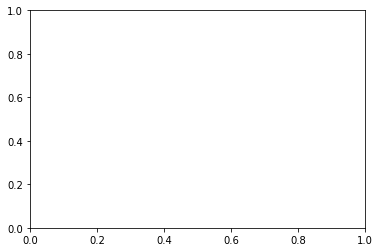

In [399]:
plt.scatter(a[1], a[0])

In [410]:
np.histogram(t, bins = np.linspace(-5, 5, 100))

(array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   1,
          0,   1,   2,   5,   3,   4,   3,   3,   7,   9,   9,   9,  26,
         27,  42,  43,  69,  58,  77,  87,  98, 127, 166, 175, 170, 204,
        213, 258, 256, 295, 326, 362, 337, 421, 400, 410, 386, 413, 402,
        405, 384, 385, 338, 349, 314, 257, 215, 212, 203, 167, 158, 126,
         90, 102,  81,  62,  50,  39,  32,  28,  29,  18,  17,  12,   7,
          4,   3,   4,   1,   1,   0,   0,   1,   0,   0,   0,   0,   1,
          0,   0,   0,   0,   0,   0,   0,   0]),
 array([-5.        , -4.8989899 , -4.7979798 , -4.6969697 , -4.5959596 ,
        -4.49494949, -4.39393939, -4.29292929, -4.19191919, -4.09090909,
        -3.98989899, -3.88888889, -3.78787879, -3.68686869, -3.58585859,
        -3.48484848, -3.38383838, -3.28282828, -3.18181818, -3.08080808,
        -2.97979798, -2.87878788, -2.77777778, -2.67676768, -2.57575758,
        -2.47474747, -2.37373737, -2.27272727, -2.17171717, -2.07070707,
 

In [412]:
np.linspace(-5, 5, 100)

array([-5.        , -4.8989899 , -4.7979798 , -4.6969697 , -4.5959596 ,
       -4.49494949, -4.39393939, -4.29292929, -4.19191919, -4.09090909,
       -3.98989899, -3.88888889, -3.78787879, -3.68686869, -3.58585859,
       -3.48484848, -3.38383838, -3.28282828, -3.18181818, -3.08080808,
       -2.97979798, -2.87878788, -2.77777778, -2.67676768, -2.57575758,
       -2.47474747, -2.37373737, -2.27272727, -2.17171717, -2.07070707,
       -1.96969697, -1.86868687, -1.76767677, -1.66666667, -1.56565657,
       -1.46464646, -1.36363636, -1.26262626, -1.16161616, -1.06060606,
       -0.95959596, -0.85858586, -0.75757576, -0.65656566, -0.55555556,
       -0.45454545, -0.35353535, -0.25252525, -0.15151515, -0.05050505,
        0.05050505,  0.15151515,  0.25252525,  0.35353535,  0.45454545,
        0.55555556,  0.65656566,  0.75757576,  0.85858586,  0.95959596,
        1.06060606,  1.16161616,  1.26262626,  1.36363636,  1.46464646,
        1.56565657,  1.66666667,  1.76767677,  1.86868687,  1.96